# Day 10 | Second week task

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
(1348,)


**1.Try to plot the faces from faces.images matrix and faces.target_names as labels. TIP: use subplots and imshow functions from matplotlib.**

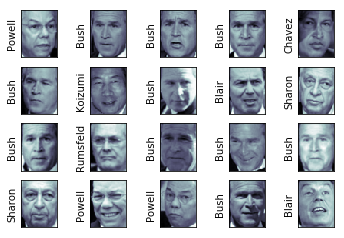

In [2]:
fig, ax = plotter.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1], color = "black")

**Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline using make_pipeline function.**

**2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command). TIP: use nonlinear Gaussian kernel in SVM (rbf) and number of PCA components (try 50 and 150).**

In [3]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#number of PCA components = 50
pca50 = PCA(n_components = 50, whiten = True, random_state = 42)

#number of PCA components = 150
pca150 = PCA(n_components = 150, whiten = True, random_state = 42)

#SVC
svc = SVC(kernel='rbf', class_weight = 'balanced')

#pipeline for 50 PCA components
pipeline50 = make_pipeline(pca50, svc)
pipeline50

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [4]:
#pipeline for 150 PCA components
pipeline150 = make_pipeline(pca150, svc)
pipeline150

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

**3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use training_test_split function from sklearn.modelselection_**

In [5]:
#splitting the data into a training and testing group
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(faces.data, faces.target, random_state=42)

**4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use GridSearchCV from sklearn.modelselection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.**

In [6]:
from sklearn.model_selection import GridSearchCV
#fixing cross validation parameters 
parameters = {'svc__C':[1, 5, 10, 50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}

grid50_cross_validation = GridSearchCV(pipeline50, parameters)
 
#fitting the 'training' data (X_train and Y_train) to find out the best parameters
grid50_cross_validation.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
#same steps with (PCA) n_components = 150
grid150_cross_validation = GridSearchCV(pipeline150, parameters)

grid150_cross_validation.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**5. Print best parameters from grid search.**

In [8]:
#best parameters for (PCA) n_components = 50
print(grid50_cross_validation.best_params_)
#best parameters for (PCA) n_components = 50
print(grid150_cross_validation.best_params_)

{'svc__C': 10, 'svc__gamma': 0.005}
{'svc__C': 10, 'svc__gamma': 0.001}


**If the optimal values fall fell at the edges, we would want to expand the grid to make sure we have found the true optimum.**

*If it is used 150 as n_component number for PCA (in pipeline), the best parameters result is: svc__C': 10, 'svc__gamma': 0.001. However, if it is used 50, the best parameters result is: svc__C': 10, 'svc__gamma': 0.005.*

*As 'svc__gamma': 0.005 falls at the edge, we are going to use the PCA with 150 components.*

**6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use predict function**

In [9]:
best_estimator = grid150_cross_validation.best_estimator_
predicted_labels = best_estimator.predict(X_test)

predicted_labels

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 3, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 3, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 0, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 7, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

**7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1.**

Text(0.5, 0.98, 'Predicted correct names in blue.\n Predicted incrorrect names in green')

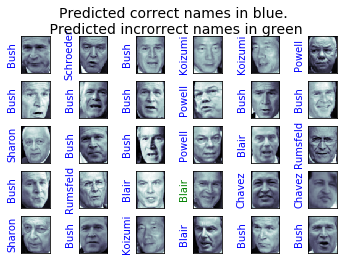

In [10]:
#exercise 1 but changing the data (estimator assigned labels)
fig, ax = plotter.subplots(5, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[predicted_labels[i]].split()[-1],
                   color='blue' if predicted_labels[i] == Y_test[i] else 'green')
fig.suptitle('Predicted correct names in blue.\n Predicted incrorrect names in green', size=14)

In [11]:
#checking the fit accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted_labels)

0.8486646884272997